In [24]:
import matplotlib.pyplot as plt
import numpy as np
import preparation as prep

In [25]:
# file path for the json datafile
path = "./mauna-loa/flask-monthly/flask_monthly.json"

# reading the data from json file
raw_co2_data = prep.get_timeseries(path, datecolumn='Timestamp', datacolumn='CO2 (ppm)')

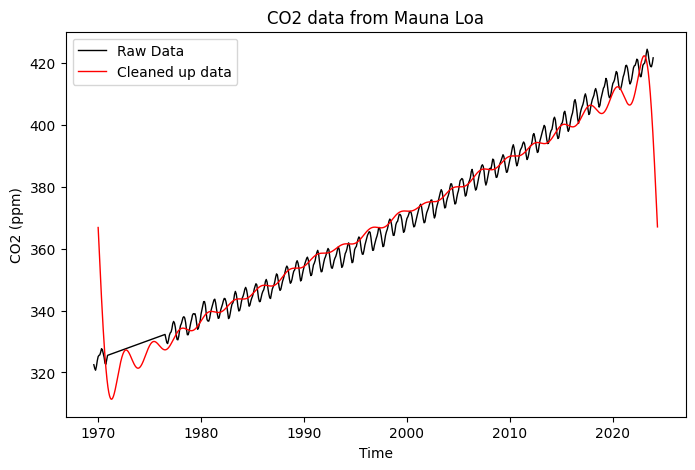

In [26]:
# plotting the raw data
plt.figure(figsize=(8, 5))
plt.plot(raw_co2_data.index, raw_co2_data, lw=1, color='black', label='Raw Data')
plt.title("CO2 data from Mauna Loa")
plt.grid()

# sampling the data to equidistant and interpolate missing data
# spacing = 'D' gives daily spacing. Use 'H' for hourly spacing.
co2_resampled = raw_co2_data.resample('D').interpolate(method='linear')

# taking the Fourier Transform of the resampled data
fft_co2 = prep.fft_mag(co2_resampled)

# removing noise by setting a cutoff value for the fft data
fft_real = fft_co2.real # real part of fft
fft_imag = fft_co2.imag # imaginary part of fft

cutoff = 0.05 * np.max(np.abs(fft_real)) # cutoff threshold below which fft is put to zero
fft_real[np.abs(fft_real) < cutoff] = 0 # putting fft data below the threshold to zero

cutoff = 0.05 * np.max(np.abs(fft_imag)) # cutoff threshold below which fft is put to zero
fft_imag[np.abs(fft_imag) < cutoff] = 0 # putting fft data below the threshold to zero

fft_co2 = fft_real+1j*fft_imag # noise cancelled fft data

ifft_co2 = prep.inv_fft(fft_co2).real   # inverse fft data

# plotting the cleaned up data
plt.plot(ifft_co2, lw=1, color='red',label='Cleaned up data')
plt.xlabel("Time")
plt.ylabel("CO2 (ppm)")
plt.grid()
plt.legend()
plt.show()